<a href="https://colab.research.google.com/github/Nandini2801/Hamoye-AI-Labs/blob/main/Hamoye_stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage E

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", sep = ';', header=0, low_memory=False,na_values = '?')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# #convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)
df.set_index('Date', inplace = True)

In [5]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [6]:
# #Convert object types to float

df.Global_active_power = df.Global_active_power.astype(float)
df.Global_reactive_power = df.Global_reactive_power.astype(float)
df.Voltage = df.Voltage.astype(float)
df.Global_intensity = df.Global_intensity.astype(float) 
df.Sub_metering_1 = df.Sub_metering_1.astype(float) 
df.Sub_metering_2 = df.Sub_metering_2.astype(float)

In [7]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [8]:
#check for missing values
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
#Fill missing values with mean
df=df.fillna(df.mean())

#recheck missing values
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0.5, 1.0, 'Upsampled Data by Day')

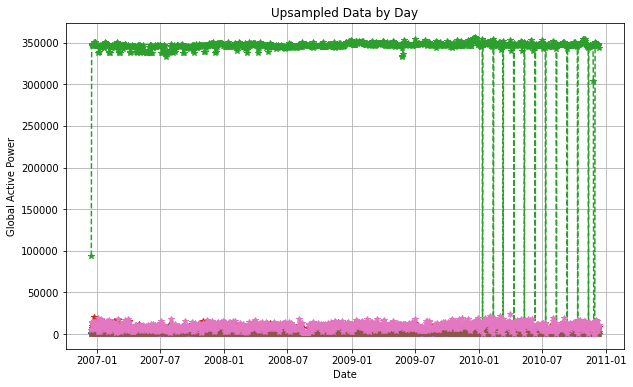

In [11]:
#Resample to daily data points
df_daily = df.resample('D').sum()

plt.figure(figsize=(10,6))
plt.plot(df_daily, '--', marker='*')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Day')

In [12]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


Text(0.5, 1.0, 'Plot of Passengers by Year')

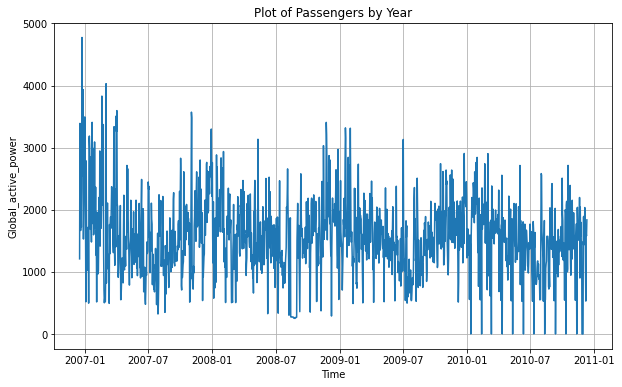

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power )
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.title('Plot of Passengers by Year')

In [14]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.127


In [15]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Voltage , df_daily.Global_intensity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.269


In [16]:

import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


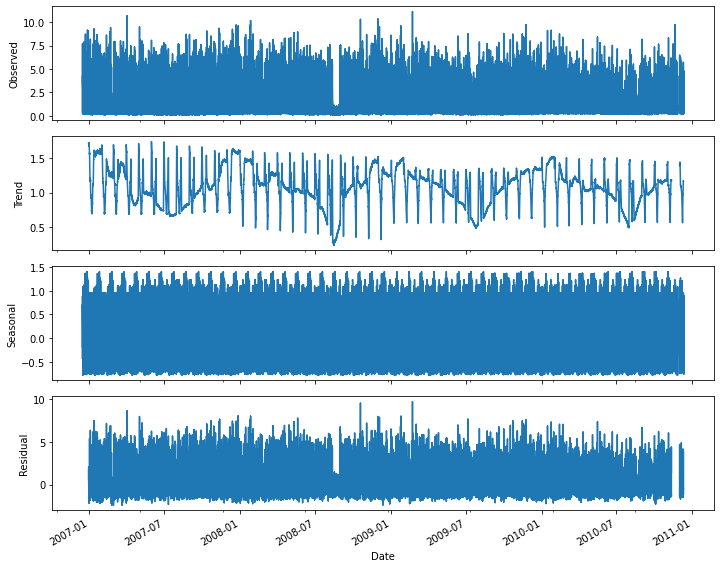

In [17]:
rcParams['figure.figsize'] = 10, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [18]:

#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -9.609344713081768
p-value: 1.8294723965607942e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
   1%: -3.4348709954268384
   5%: -2.863536715724964
   10%: -2.567833035595811


In [19]:

from fbprophet import Prophet

In [20]:
df_daily_copy = df_daily.reset_index()
df_daily_copy.head(2)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [21]:
#Create a subset of date and Global_active_power
df_daily_copy = df_daily_copy[['Date','Global_active_power']]
df_daily_copy.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [22]:
df_daily_copy = df_daily_copy.rename(columns={"Date": "ds", "Global_active_power": "y"})

In [23]:
df_daily_copy.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [24]:
X = df_daily_copy
y  = df_daily_copy.y

In [25]:
x = int(len(X))
X_train, X_test = X[:365], X[365:]
y_train, y_test = y[:365], y[365:]

In [26]:
model = Prophet()
model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=20, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

# #predict daily for the next year 
# future = model.make_future_dataframe(periods=396, freq= 'D')
# forecast = model.predict(future)
# daily_plot = forecast[174:][['ds', 'yearly', 'trend']]
# plt.figure(figsize=(14,8))
# plt.subplots_adjust(hspace=0.25)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,2115.986698,1360.624176,3015.970484,2115.986698,2115.986698,101.523250,101.523250,101.523250,101.523250,101.523250,101.523250,0.0,0.0,0.0,2217.509948
1,2006-12-17,2111.888545,1437.916561,3081.251706,2111.888545,2111.888545,186.117051,186.117051,186.117051,186.117051,186.117051,186.117051,0.0,0.0,0.0,2298.005596
2,2006-12-18,2107.790391,1207.466507,2884.700208,2107.790391,2107.790391,-35.169420,-35.169420,-35.169420,-35.169420,-35.169420,-35.169420,0.0,0.0,0.0,2072.620971
3,2006-12-19,2103.692238,1244.511436,2907.116967,2103.692238,2103.692238,-33.745074,-33.745074,-33.745074,-33.745074,-33.745074,-33.745074,0.0,0.0,0.0,2069.947164
4,2006-12-20,2099.594084,1242.850737,2907.761314,2099.594084,2099.594084,-36.376813,-36.376813,-36.376813,-36.376813,-36.376813,-36.376813,0.0,0.0,0.0,2063.217271
5,2006-12-21,2095.495931,1103.840345,2745.590921,2095.495931,2095.495931,-136.167095,-136.167095,-136.167095,-136.167095,-136.167095,-136.167095,0.0,0.0,0.0,1959.328836
6,2006-12-22,2091.397778,1201.472044,2871.472275,2091.397778,2091.397778,-46.181900,-46.181900,-46.181900,-46.181900,-46.181900,-46.181900,0.0,0.0,0.0,2045.215877
7,2006-12-23,2087.299624,1329.056960,3049.729408,2087.299624,2087.299624,101.523250,101.523250,101.523250,101.523250,101.523250,101.523250,0.0,0.0,0.0,2188.822875
8,2006-12-24,2083.201471,1443.045571,3135.710542,2083.201471,2083.201471,186.117051,186.117051,186.117051,186.117051,186.117051,186.117051,0.0,0.0,0.0,2269.318522
9,2006-12-25,2079.103317,1195.172517,2909.518934,2079.103317,2079.103317,-35.169420,-35.169420,-35.169420,-35.169420,-35.169420,-35.169420,0.0,0.0,0.0,2043.933897


In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2217.509948,1360.624176,3015.970484,2115.986698,2115.986698,2115.986698
1,2006-12-17,2298.005596,1437.916561,3081.251706,2111.888545,2111.888545,2111.888545
2,2006-12-18,2072.620971,1207.466507,2884.700208,2107.790391,2107.790391,2107.790391
3,2006-12-19,2069.947164,1244.511436,2907.116967,2103.692238,2103.692238,2103.692238
4,2006-12-20,2063.217271,1242.850737,2907.761314,2099.594084,2099.594084,2099.594084
...,...,...,...,...,...,...,...
380,2007-12-31,1707.947365,887.041590,2581.733999,1743.116785,1739.611538,1746.447359
381,2008-01-01,1712.023571,890.330927,2565.153717,1745.768645,1741.795758,1749.515595
382,2008-01-02,1712.043692,871.570869,2573.983101,1748.420505,1743.942001,1752.576326
383,2008-01-03,1614.905269,762.140334,2446.667141,1751.072364,1746.086679,1755.655976


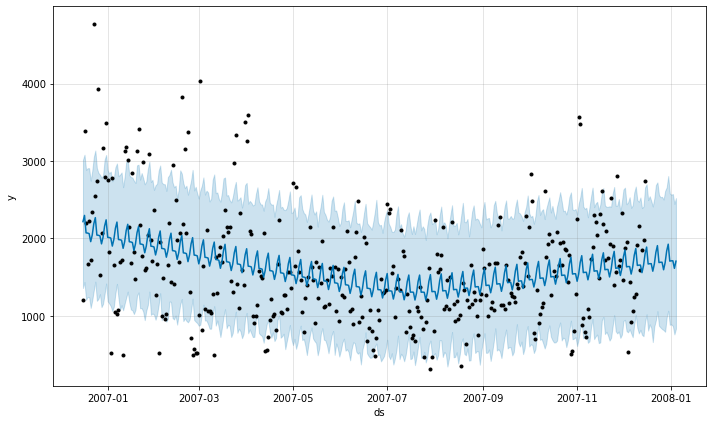

In [29]:
model.plot(forecast)
plt.show()

In [30]:
#Calculate MAPE

import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [31]:
actual = y_train
pred = forecast['yhat'][:365]

mape(actual, pred)

41.19236263192639

In [32]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:365]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

659.9704218809433
